In [1]:
import math
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import odeint
import sys
from IPython.display import Image
from IPython.core.display import HTML 

# Data

In [2]:
data = pd.read_csv('spain.csv', index_col=0)
data = data[10:]  # инфекции появляются только на 11 день
data['Заражений'] -= (data['Выздоровлений'] + data['Смертей'])


Infected = data['Заражений']
Recovered = data['Выздоровлений']
Death = data['Смертей']

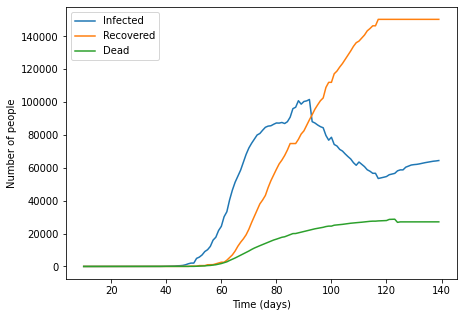

In [3]:
plt.figure(figsize=(7, 5))
plt.plot(Infected, label='Infected')
plt.plot(Recovered, label='Recovered')
plt.plot(Death, label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()

# Generalized SEIR model

In [4]:
Image(url= "https://i.imgur.com/66y03Et.png")

In [4]:
# Spain's population
N=46754778

# diff equations
def diff_equation(y, t, *params):
    P, S, E, I, Q, R, D = y
    alpha_, beta_, gamma_, delta_, lambda_, k_ = params

    dP = alpha_*S
    dS = -(beta_*(I/N) + alpha_)*S
    dE = beta_*(I/N)*S - gamma_*E
    dI = gamma_*E - delta_*I
    dQ = delta_*I - (lambda_ + k_)*Q
    dR = lambda_*Q
    dD = k_*Q

    dydt = [dP, dS, dE, dI, dQ, dR, dD]
    
    return dydt


t = np.arange(data.shape[0])[:-10] # train
y0 = [0.01*(N-2), 0.99*(N-2), 2, 0, 0, 0, 0] # [P, S, E, I, Q, R, D]

# alpha, beta, gamma, delta, lambda, k
params = [np.linspace(0.01, 0.15, 10), np.linspace(1, 1.8, 20), np.linspace(0.1, 0.5, 10), 
          np.linspace(0.1, 0.5, 10), np.linspace(0.001, 0.6, 10), np.linspace(0.0001, 0.03, 5)]

#sol = odeint(diff_equation, y0, t, args=initial_params)

In [5]:
def RMSE(A, B):
    return np.sqrt(((A - B)**2).mean())

In [6]:
from sklearn.model_selection import ParameterGrid

err = []
param_grid = {'alpha': params[0], 'beta': params[1], 'gamma': params[2], 'delta': params[3],
             'lambda': params[4], 'k': params[5]}
grid = ParameterGrid(param_grid)

for i, parameters in enumerate(grid):
    
    sol = odeint(diff_equation, 
                 y0, 
                 t, 
                 args=(parameters['alpha'], parameters['beta'], parameters['gamma'], parameters['delta'],
                       parameters['lambda'], parameters['k']))

    i_err = RMSE(Infected[:-10], sol[:, 2] + sol[:, 3] + sol[:, 4])
    r_err = RMSE(Recovered[:-10], sol[:, 5])
    d_err = RMSE(Death[:-10], sol[:, 6])
    
    if i % 5000 == 0:
        print('------------------')
        print('%s steps' %i)
        print('RMSE for Dead:', d_err)
        print('RMSE for Recovered:', r_err)
        print('RMSE for Infected:', i_err)

    err.append((i_err, r_err, d_err))

------------------
0 steps
RMSE for Dead: 15720.344824112612
RMSE for Recovered: 70829.46451819915
RMSE for Infected: 2849162.0733279535
------------------
5000 steps
RMSE for Dead: 15358.62088542361
RMSE for Recovered: 67048.2469130366
RMSE for Infected: 3872136.7145584063
------------------
10000 steps
RMSE for Dead: 14890.64174389552
RMSE for Recovered: 62392.37415080739
RMSE for Infected: 4942414.109894918
------------------
15000 steps
RMSE for Dead: 14320.885581129767
RMSE for Recovered: 57229.59146361913
RMSE for Infected: 5993013.8243213445
------------------
20000 steps
RMSE for Dead: 13668.909088645
RMSE for Recovered: 52346.588695954924
RMSE for Infected: 6987083.871372144
------------------
25000 steps
RMSE for Dead: 12968.237823982945
RMSE for Recovered: 49008.62967053608
RMSE for Infected: 7911832.725246031
------------------
30000 steps
RMSE for Dead: 12263.700223319556
RMSE for Recovered: 48732.884260546685
RMSE for Infected: 8767454.25790408
------------------
35000 st

------------------
295000 steps
RMSE for Dead: 16480.043600563728
RMSE for Recovered: 79118.41076613188
RMSE for Infected: 45988.66986622319
------------------
300000 steps
RMSE for Dead: 16501.53612988324
RMSE for Recovered: 79343.78914432033
RMSE for Infected: 55635.24982802253
------------------
305000 steps
RMSE for Dead: 16501.495105331847
RMSE for Recovered: 79343.3712697647
RMSE for Infected: 55623.84489189252
------------------
310000 steps
RMSE for Dead: 16501.448628878625
RMSE for Recovered: 79342.89752278365
RMSE for Infected: 55610.76624979091
------------------
315000 steps
RMSE for Dead: 16501.396028490097
RMSE for Recovered: 79342.360976609
RMSE for Infected: 55595.78797862771
------------------
320000 steps
RMSE for Dead: 16501.336555321766
RMSE for Recovered: 79341.75390846457
RMSE for Infected: 55578.656081079775
------------------
325000 steps
RMSE for Dead: 16501.26937554529
RMSE for Recovered: 79341.06771444077
RMSE for Infected: 55559.08526528833
-----------------

------------------
590000 steps
RMSE for Dead: 16501.44099915993
RMSE for Recovered: 79342.8539276811
RMSE for Infected: 55623.992749045494
------------------
595000 steps
RMSE for Dead: 16501.411093764957
RMSE for Recovered: 79342.55225310862
RMSE for Infected: 55617.051458673486
------------------
600000 steps
RMSE for Dead: 16501.760109933955
RMSE for Recovered: 79346.06616514425
RMSE for Infected: 55695.327335158225
------------------
605000 steps
RMSE for Dead: 16501.755310807133
RMSE for Recovered: 79346.0181836096
RMSE for Infected: 55694.38273845979
------------------
610000 steps
RMSE for Dead: 16501.750195831326
RMSE for Recovered: 79345.96703147543
RMSE for Infected: 55693.371239688706
------------------
615000 steps
RMSE for Dead: 16501.744746686138
RMSE for Recovered: 79345.91252415207
RMSE for Infected: 55692.288695402036
------------------
620000 steps
RMSE for Dead: 16501.738944109067
RMSE for Recovered: 79345.85446752455
RMSE for Infected: 55691.13073607753
-----------

------------------
885000 steps
RMSE for Dead: 16501.72789402092
RMSE for Recovered: 79345.74624877432
RMSE for Infected: 55689.800525257815
------------------
890000 steps
RMSE for Dead: 16501.723134876567
RMSE for Recovered: 79345.6987678199
RMSE for Infected: 55688.90270712794
------------------
895000 steps
RMSE for Dead: 16501.718172693963
RMSE for Recovered: 79345.64925539866
RMSE for Infected: 55687.964507227036
------------------
900000 steps
RMSE for Dead: 16501.79014199926
RMSE for Recovered: 79346.36673714836
RMSE for Infected: 55701.348584294275
------------------
905000 steps
RMSE for Dead: 16501.788452919805
RMSE for Recovered: 79346.3499472065
RMSE for Infected: 55701.051908713125
------------------
910000 steps
RMSE for Dead: 16501.786694849066
RMSE for Recovered: 79346.33246934836
RMSE for Infected: 55700.742374687834
------------------
915000 steps
RMSE for Dead: 16501.784865412923
RMSE for Recovered: 79346.31427983698
RMSE for Infected: 55700.41951676519
------------

In [7]:
np.save('spain_err', err)

In [8]:
opt_i = grid[np.argmin(err, axis=0)[0]]
opt_r = grid[np.argmin(err, axis=0)[1]]
opt_d = grid[np.argmin(err, axis=0)[2]]

In [9]:
ls = [(a+b+c)/3 for a, b, c in err]
opt_avg = grid[np.argmin(ls, axis=0)]

# Good fit: average

In [20]:
# now, to draw we use full dataset
t = np.arange(data.shape[0])

(1, 463650.045941471)

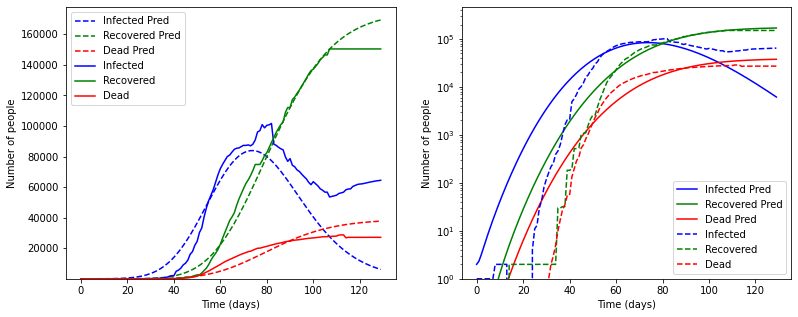

In [25]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_avg['alpha'], opt_avg['beta'], opt_avg['gamma'], opt_avg['delta'],
                   opt_avg['lambda'], opt_avg['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r', label='Dead Pred')
plt.plot(t, Infected, 'b--', label='Infected')
plt.plot(t, Recovered, 'g--', label='Recovered')
plt.plot(t, Death, 'r--', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [22]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 54549.01520904796
RMSE for recovered on last 10 days: 16833.052042109404
RMSE for dead on last 10 days: 10108.696880472302


In [24]:
print('Train RMSE scores:')
err[np.argmin(ls, axis=0)]

Train RMSE scores:


(16712.539334557052, 4721.1468037290315, 3691.0325805237094)

In [23]:
print('best parameters:')
{k:round(v, 4) for k, v in opt_avg.items()}

best parameters:


{'lambda': 0.0676,
 'k': 0.015,
 'gamma': 0.3667,
 'delta': 0.1889,
 'beta': 1.0842,
 'alpha': 0.0256}

(1, 1211638.5105631226)

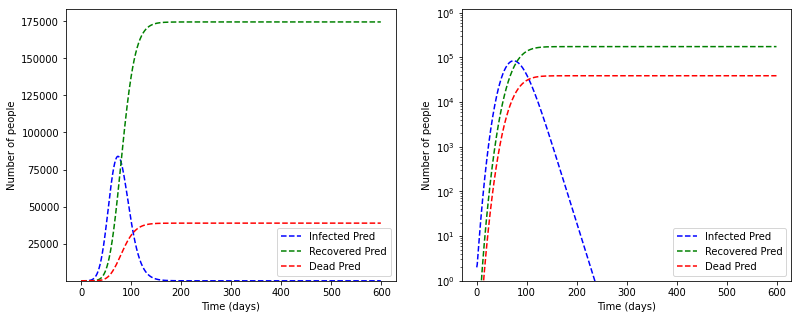

In [26]:
# predicting epidemic end
# I choose best parameters and big t

t = np.arange(600)

sol = odeint(diff_equation, 
             y0, 
             t = t, 
             args=(opt_avg['alpha'], opt_avg['beta'], opt_avg['gamma'], opt_avg['delta'],
                   opt_avg['lambda'], opt_avg['k']))



plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [28]:
x = sol[:, 2] + sol[:, 3] + sol[:, 4]
for i, val in enumerate(x):
    if val <= 1:
        print('Epidemic will end in ~ %s days' %i)
        break

Epidemic will end in ~ 236 days


# Bad fits: infected, recovered and dead

(1, 465860.70552048413)

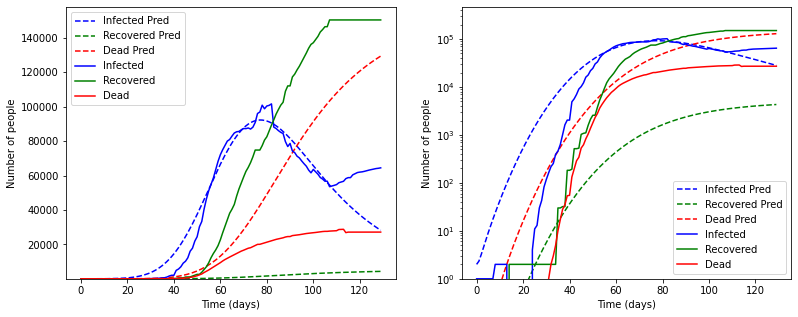

In [13]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_i['alpha'], opt_i['beta'], opt_i['gamma'], opt_i['delta'],
                   opt_i['lambda'], opt_i['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [15]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 30967.570827476597
RMSE for recovered on last 10 days: 146202.98853445495
RMSE for dead on last 10 days: 98098.6760705752


(1, 18218867.061411634)

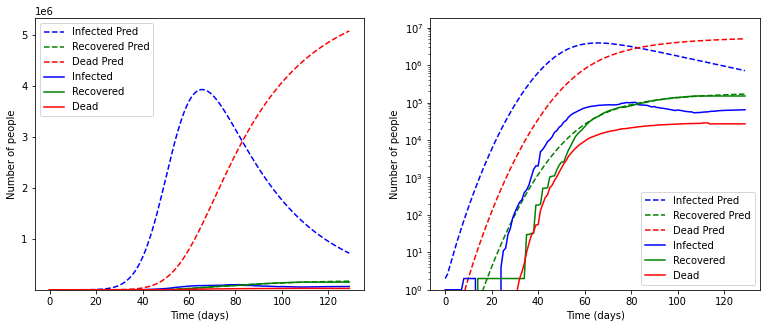

In [16]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_r['alpha'], opt_r['beta'], opt_r['gamma'], opt_r['delta'],
                   opt_r['lambda'], opt_r['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [17]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 767736.0418702569
RMSE for recovered on last 10 days: 15255.36681988927
RMSE for dead on last 10 days: 4936746.150321538


(1, 6540410.644431487)

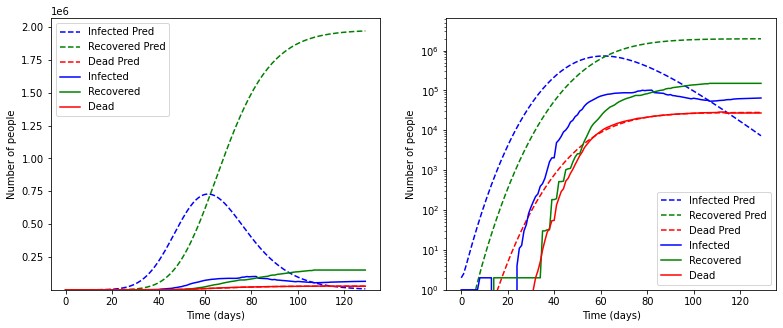

In [18]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_d['alpha'], opt_d['beta'], opt_d['gamma'], opt_d['delta'],
                   opt_d['lambda'], opt_d['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [19]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 51890.05655687744
RMSE for recovered on last 10 days: 1815270.7383264631
RMSE for dead on last 10 days: 781.6381937744451
